# 03.12 Crosstabs with visualizations

### This script contains the following points:
### 1. Import libraries and file
### 2. Address protected information data security issues in the data
### 3. Create "region" column for geographical segmentation of states
### 4. Examine the differences in spending habits by U.S. region
### 5. Exclude low activity customersfrom data
### 6. Conduct additional descriptive analysis
#### 6.1 Display department categories for reference
#### 6.2 Create categories to break down age, dependants, and income variables
#### 6.3 Visualize crossed variables from descriptive analysis
### 7. Create profiling variables
#### 7.1 Create first profiling variable: young working adults without kids, upper income
#### 7.2 Run aggregations on first profiling sample and compare to population
#### 7.3 Create second profiling variable: retired adults with dependants, upper income
#### 7.4 Run aggregations on second profiling sample 
#### 7.5 Create third profiling variable: working parents, middle income
#### 7.6 Run aggregations on third profiling sample
### 8. Group and aggregate orders in top selling departments
#### 8.1 Create subsets of high-selling Produce and Dairy/ Egg department orders
#### 8.2 Check sales patterns on high-priced order subsets
### 9. Export charts and datasets


### 1. Import libraries and file

In [214]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [215]:
# Import files

path = r'C:\Users\dsadl\OneDrive\Documents\Career Foundry\Data Immersion\Project 4\05-10-2023 Instacart Basket Analysis'

In [216]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [217]:
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [218]:
# Inspect file

ords_prods_cust.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,order_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443895,2543867,5,1,9,30.0,196,2,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443897,1285508,7,5,15,11.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443898,2578584,8,1,15,10.0,196,2,1,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443892,423547,2,2,9,14.0,38928,1,0,both,38932,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443893,2524893,3,3,11,30.0,38928,1,1,both,38932,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [219]:
# Change default view to see all columns across

pd.options.display.max_columns = None

In [220]:
ords_prods_cust.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,Unnamed: 0_x,order_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443895,2543867,5,1,9,30.0,196,2,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443897,1285508,7,5,15,11.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443898,2578584,8,1,15,10.0,196,2,1,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443892,423547,2,2,9,14.0,38928,1,0,both,38932,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,443893,2524893,3,3,11,30.0,38928,1,1,both,38932,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


### 2. Address protected information data security issues in the data

In [221]:
# Remove first and last names for privacy

ords_prods_cust.drop(columns = ['first_name','last_name','Unnamed: 0_x', 'Unnamed: 0_y'], axis='columns', inplace=True)

### 3. Create "region" column for geographical segmentation of states

In [222]:
# Use for-loop if statement to create region category

result = []

for value in ords_prods_cust['state']:
  if (value == 'Maine'or value == 'New Hampshire' or value =='Vermont'or value =='Massachusetts'or value =='Rhode Island'or value =='Connecticut'or value =='New York'or value =='Pennsylvania'or value =='New Jersey'):
    result.append("Northeast")
  elif (value == 'Wisconsin' or value =='Michigan' or value =='Illinois' or value =='Indiana' or value =='Ohio' or value =='North Dakota' or value =='South Dakota' or value =='Nebraska' or value =='Kansas' or value =='Minnesota'or value =='Iowa' or value =='Missouri'):
    result.append("Midwest")
  elif (value =='Delaware' or value =='Maryland' or value =='District of Columbia' or value =='Virginia' or value =='West Virginia' or value =='North Carolina' or value =='South Carolina' or value =='Georgia' or value =='Florida' or value =='Kentucky' or value =='Tennessee' or value =='Mississippi' or value =='Alabama' or value =='Oklahoma' or value =='Arkansas' or value =='Louisiana'):
    result.append("South")
  else:
    result.append("West")

In [223]:
# Rename result as 'region' column

ords_prods_cust['region'] = result

In [224]:
# Check results

ords_prods_cust['region'].value_counts(dropna = False)

South        10151491
West          8933307
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### 4. Examine the differences in spending habits by U.S. region

In [225]:
# Use crosstab function to compare "region" and "spending_flag" columns

crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], dropna = False)

In [226]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,193786,9957705
West,176259,8757048


### 5. Exclude low-activity customers from data

In [227]:
# Use loc() function to divide customers into regular and low-activity categories using "max_order" column

ords_prods_cust.loc[ords_prods_cust['max_order']<5,'cust_activity'] = 'Low-activity customer'

In [228]:
ords_prods_cust.loc[ords_prods_cust['max_order']>=5,'cust_activity'] = 'Regular customer'

In [229]:
# Check the categories

ords_prods_cust['cust_activity'].value_counts(dropna = False)

Regular customer         30964564
Low-activity customer     1440295
Name: cust_activity, dtype: int64

In [230]:
# Create subset of data exluding the customers labeled "low-activity customer"

ords_prods_cust_low = ords_prods_cust[ords_prods_cust['cust_activity']=="Low-activity customer"]

In [231]:
# Check success of creating subset

ords_prods_cust_low.shape

(1440295, 34)

### 6. Conduct additional descriptive analysis

#### 6.1 Display department categories for reference

In [232]:
# Display department categories

dept

,Unnamed: 0,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


#### 6.2  Create categories to break down age, dependants, income, and order time variables

In [233]:
#Create age_category column

ords_prods_cust.loc[ords_prods_cust['age'] <= 30,'age_category'] = '30 and Under'

In [234]:
ords_prods_cust.loc[(ords_prods_cust['age'] > 30) & (ords_prods_cust['age'] <= 60),'age_category'] = '31 to 60'

In [235]:
ords_prods_cust.loc[(ords_prods_cust['age'] > 60),'age_category'] = 'Over 60'

In [236]:
# Check categories

ords_prods_cust['age_category'].value_counts(dropna = False)

31 to 60        15222661
Over 60         10582839
30 and Under     6599359
Name: age_category, dtype: int64

In [237]:
# Create dependant category

ords_prods_cust.loc[ords_prods_cust['n_dependants'] == 0,'dep_category'] = 'None'

In [238]:
ords_prods_cust.loc[ords_prods_cust['n_dependants'] != 0,'dep_category'] = 'Dependants'

In [239]:
# Check categories

ords_prods_cust['dep_category'].value_counts(dropna = False)

Dependants    24307356
None           8097503
Name: dep_category, dtype: int64

In [240]:
# Create income category

ords_prods_cust.loc[ords_prods_cust['income'] < 50000,'income_category'] = 'Less than 50K'

In [241]:
ords_prods_cust.loc[(ords_prods_cust['income'] >= 50000) & (ords_prods_cust['income'] <= 100000),'income_category'] = '50 to 100K'

In [242]:
ords_prods_cust.loc[(ords_prods_cust['income'] >= 100000) & (ords_prods_cust['income'] <= 250000),'income_category'] = '100 to 250K'

In [243]:
ords_prods_cust.loc[ords_prods_cust['income'] > 250000,'income_category'] = 'More than 250K'

In [244]:
# Check categories

ords_prods_cust['income_category'].value_counts(dropna = False)

100 to 250K       14632186
50 to 100K        13996010
Less than 50K      3594083
More than 250K      182580
Name: income_category, dtype: int64

In [245]:
# Create time_category to separate order times of day

ords_prods_cust.loc[(ords_prods_cust['order_time'] >= 22) | (ords_prods_cust['order_time'] >= 0) |(ords_prods_cust['order_time'] < 6), 'time_category'] = 'Overnight' 


In [246]:
ords_prods_cust.loc[(ords_prods_cust['order_time'] >= 6) & (ords_prods_cust['order_time'] < 12), 'time_category'] = 'Morning'

In [247]:
ords_prods_cust.loc[(ords_prods_cust['order_time'] >= 12) & (ords_prods_cust['order_time'] <= 16), 'time_category'] = 'Afternoon'

In [248]:
ords_prods_cust.loc[(ords_prods_cust['order_time'] > 16) & (ords_prods_cust['order_time'] < 22), 'time_category'] = 'Evening'

In [249]:
ords_prods_cust['time_category'].value_counts(dropna = False)

Afternoon    13165968
Morning      10851768
Evening       6754254
Overnight     1632869
Name: time_category, dtype: int64

#### 6.3 Visualize crossed variables from descriptive analysis

In [250]:
# Create crosstab to compare age and income categories

crosstab_2 = pd.crosstab(ords_prods_cust['age_category'], ords_prods_cust['income_category'], dropna = False)

In [251]:
crosstab_2

income_category,100 to 250K,50 to 100K,Less than 50K,More than 250K
age_category,,,,
30 and Under,187500,5352058,1043274,16527
31 to 60,7134535,6338372,1657635,92119
Over 60,7310151,2305580,893174,73934


In [252]:
# Reorganize the columns, ascending order

crosstab_2 = crosstab_2.reindex(['Less than 50K', '50 to 100K', '100 to 250K','More than 250K'], 
     axis="columns")

[Text(0, 0, '16,527'), Text(0, 0, '92,119'), Text(0, 0, '73,934')]

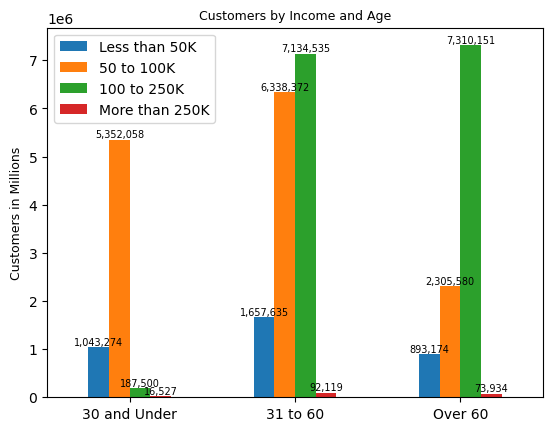

In [253]:
# Visualize age and income in bar chart

bar_age_income = crosstab_2.sort_index().plot.bar()

# Set labels for x-axis
bar_age_income.set(xlabel=None)

bar_age_income.set_xticklabels(labels=['30 and Under','31 to 60','Over 60'], rotation=0)

# Set label for y-axis
bar_age_income.set_ylabel( "Customers in Millions" , size = 9 )

# Set legend
bar_age_income.legend( title=None, loc = 'upper left')
  
# Set title for plot
bar_age_income.set_title( "Customers by Income and Age" , size = 9 )

# Add bar labels
bar_age_income.bar_label(bar_age_income.containers[0], fmt='{:,.0f}', size=7)
bar_age_income.bar_label(bar_age_income.containers[1], fmt='{:,.0f}', size=7)
bar_age_income.bar_label(bar_age_income.containers[2], fmt='{:,.0f}', size=7)
bar_age_income.bar_label(bar_age_income.containers[3], fmt='{:,.0f}', size=7)

In [254]:
# Create crosstab to compare age and dependant categories

crosstab_3 = pd.crosstab(ords_prods_cust['age_category'], ords_prods_cust['dep_category'], dropna = False)

In [255]:
crosstab_3

dep_category,Dependants,None
age_category,,
30 and Under,4955070,1644289
31 to 60,11424038,3798623
Over 60,7928248,2654591


[Text(0, 0, '1,644,289'), Text(0, 0, '3,798,623'), Text(0, 0, '2,654,591')]

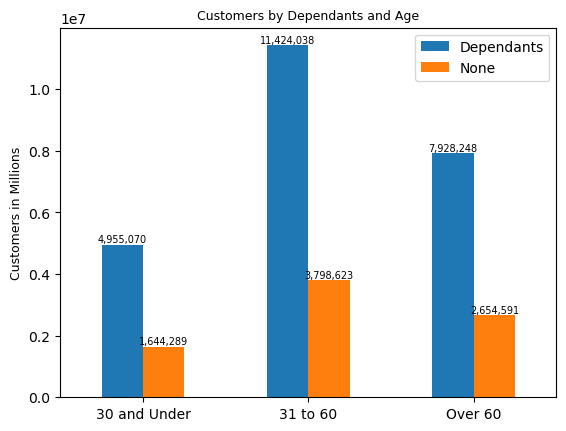

In [256]:
# Visualize age and dependant categories

bar_age_dep = crosstab_3.plot.bar()

# Set label for x-axis
bar_age_dep.set(xlabel=None)

bar_age_dep.set_xticklabels(labels=['30 and Under','31 to 60','Over 60'], rotation=0)

# Set label for y-axis
bar_age_dep.set_ylabel( "Customers in Millions" , size = 9 )

# Set legend
bar_age_dep.legend( title=None)
  
# Set title for plot
bar_age_dep.set_title( "Customers by Dependants and Age" , size = 9 )

# Add bar labels
bar_age_dep.bar_label(bar_age_dep.containers[0], fmt='{:,.0f}', size=7)
bar_age_dep.bar_label(bar_age_dep.containers[1], fmt='{:,.0f}', size=7)

In [257]:
# Create crosstab to compare age and loyalty categories

crosstab_4 = pd.crosstab(ords_prods_cust['age_category'], ords_prods_cust['loyalty_flag'], dropna = False)

[Text(0, 0, '3,263,676'), Text(0, 0, '7,444,378'), Text(0, 0, '5,168,722')]

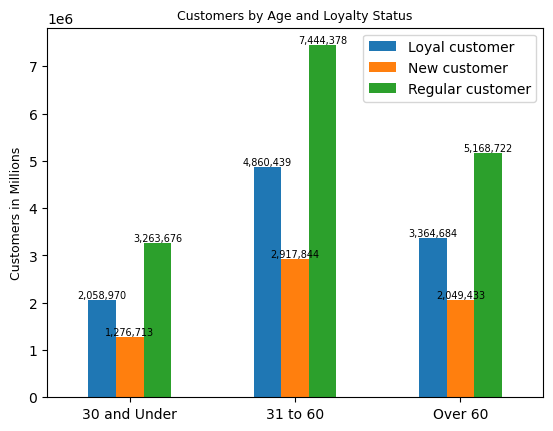

In [258]:
# Visualize categories

bar_age_loyalty = crosstab_4.plot.bar()

# Set labels for x-axis
bar_age_loyalty.set(xlabel=None)

bar_age_loyalty.set_xticklabels(labels=['30 and Under','31 to 60','Over 60'], rotation=0)

# Set label for y-axis
bar_age_loyalty.set_ylabel( "Customers in Millions" , size = 9 )
  
# Set legend
bar_age_loyalty.legend( title=None)
  
# Set title for plot
bar_age_loyalty.set_title( "Customers by Age and Loyalty Status" , size = 9 )

# Add bar labels
bar_age_loyalty.bar_label(bar_age_loyalty.containers[0], fmt='{:,.0f}', size=7)
bar_age_loyalty.bar_label(bar_age_loyalty.containers[1], fmt='{:,.0f}', size=7)
bar_age_loyalty.bar_label(bar_age_loyalty.containers[2], fmt='{:,.0f}', size=7)

In [259]:
# Create crosstab to compare region and loyalty categories

crosstab_5 = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['loyalty_flag'], dropna = False)

[Text(0, 0, '3,750,978'),
 Text(0, 0, '2,780,744'),
 Text(0, 0, '5,001,980'),
 Text(0, 0, '4,343,074')]

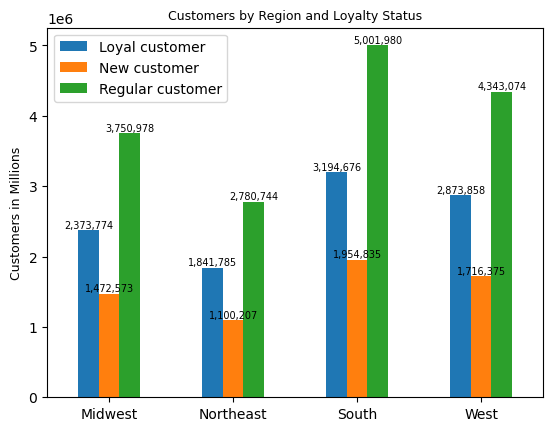

In [260]:
# Visualize categories

bar_region_loyalty = crosstab_5.plot.bar()

# Set label for x-axis
bar_region_loyalty.set(xlabel=None)

bar_region_loyalty.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Set label for y-axis
bar_region_loyalty.set_ylabel( "Customers in Millions" , size = 9 )
  
# Set legend
bar_region_loyalty.legend( title=None)
  
# Set title for plot
bar_region_loyalty.set_title( "Customers by Region and Loyalty Status" , size = 9 )

# Add bar labels
bar_region_loyalty.bar_label(bar_region_loyalty.containers[0], fmt='{:,.0f}', size=7)
bar_region_loyalty.bar_label(bar_region_loyalty.containers[1], fmt='{:,.0f}', size=7)
bar_region_loyalty.bar_label(bar_region_loyalty.containers[2], fmt='{:,.0f}', size=7)

In [261]:
# Create crosstab to compare age and region

crosstab_6 = pd.crosstab(ords_prods_cust['age_category'], ords_prods_cust['region'], dropna = False)

[Text(0, 0, '1,815,070'), Text(0, 0, '4,204,591'), Text(0, 0, '2,913,646')]

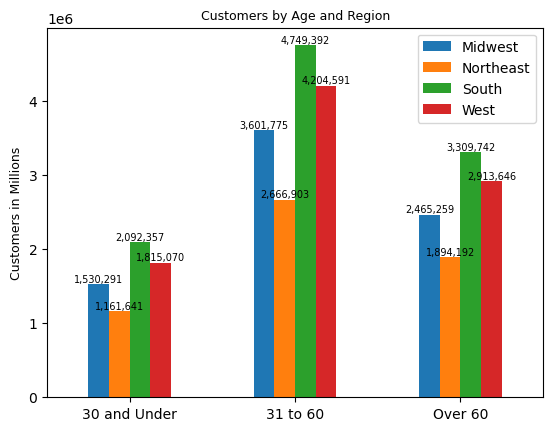

In [262]:
# Visualize the crosstab

bar_age_region = crosstab_6.plot.bar()

# Set labels for x-axis
bar_age_region.set(xlabel=None)

bar_age_region.set_xticklabels(labels=['30 and Under','31 to 60','Over 60'], rotation=0)

# Set label for y-axis
bar_age_region.set_ylabel( "Customers in Millions" , size = 9 )
  
# Set legend
bar_age_region.legend( title=None)
  
# Set title for plot
bar_age_region.set_title( "Customers by Age and Region" , size = 9 )

# Add bar labels
bar_age_region.bar_label(bar_age_region.containers[0], fmt='{:,.0f}', size=7)
bar_age_region.bar_label(bar_age_region.containers[1], fmt='{:,.0f}', size=7)
bar_age_region.bar_label(bar_age_region.containers[2], fmt='{:,.0f}', size=7)
bar_age_region.bar_label(bar_age_region.containers[3], fmt='{:,.0f}', size=7)

In [263]:
# Examine order time by order day of week

time_crosstab = pd.crosstab(ords_prods_cust['orders_day_of_week'], ords_prods_cust['time_category'],dropna = False)

# Reorder columns

time_crosstab = time_crosstab.reindex(['Morning', 'Afternoon', 'Evening','Overnight'], 
     axis="columns")

[Text(0, 0, '294,579'),
 Text(0, 0, '244,348'),
 Text(0, 0, '212,312'),
 Text(0, 0, '205,587'),
 Text(0, 0, '215,462'),
 Text(0, 0, '218,514'),
 Text(0, 0, '242,067')]

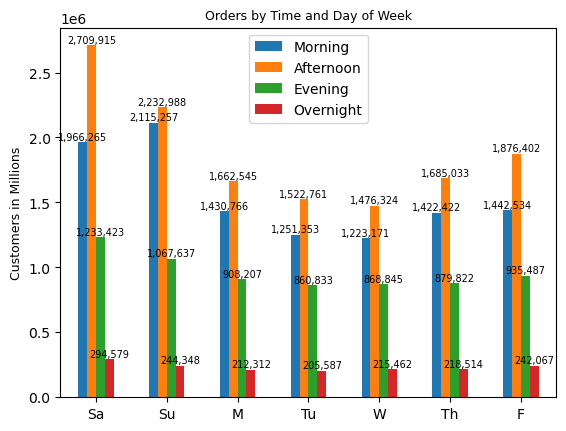

In [264]:
# Visualize order time and day of week

bar_time_cat = time_crosstab.plot.bar()
bar_time_cat.set_xticklabels(['Sa','Su','M','Tu','W','Th','F'], rotation=0)
bar_time_cat.set(xlabel=None)
bar_time_cat.set_ylabel( "Customers in Millions" , size = 9 )
bar_time_cat.set_title( "Orders by Time and Day of Week" , size = 9 )
bar_time_cat.legend(title=None, loc = 'upper center')

# Add bar labels
bar_time_cat.bar_label(bar_time_cat.containers[0], fmt='{:,.0f}', size = 7)
bar_time_cat.bar_label(bar_time_cat.containers[1], fmt='{:,.0f}', size = 7)
bar_time_cat.bar_label(bar_time_cat.containers[2], fmt='{:,.0f}', size = 7)
bar_time_cat.bar_label(bar_time_cat.containers[3], fmt='{:,.0f}', size = 7)

#### Categorizing and visualizing the data in this step provides clearer understanding of how the demographic factors in the data set. This will help in creating customer profiles to use for targeted marketing that are representative of our typical customers.

### 7. Create profiling variables

#### 7.1 Create first profiling variable: young working adults without kids, upper income

In [265]:
# Define profiling variable for young adult without kids - age category

ya = ords_prods_cust[ords_prods_cust['age_category'] == "30 and Under"]

In [266]:
# Check sample created

ya.shape

(6599359, 38)

In [267]:
ya.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,region,cust_activity,age_category,dep_category,income_category,time_category
351,130797,Female,Maryland,26,1/1/2017,1,married,40374,154902,2,3,13,9.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Mid-range product,Least busy,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,Regular customer,30 and Under,Dependants,Less than 50K,Afternoon
352,130797,Female,Maryland,26,1/1/2017,1,married,40374,2148701,13,4,13,8.0,13032,4,0,both,Cinnamon Toast Crunch,121,14,4.0,Low-range product,Least busy,Low-range product,Least busy,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,Regular customer,30 and Under,Dependants,Less than 50K,Afternoon
353,130797,Female,Maryland,26,1/1/2017,1,married,40374,408075,18,4,10,7.0,13032,4,1,both,Cinnamon Toast Crunch,121,14,4.0,Low-range product,Least busy,Low-range product,Least busy,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,Regular customer,30 and Under,Dependants,Less than 50K,Morning
354,130797,Female,Maryland,26,1/1/2017,1,married,40374,661530,23,4,10,6.0,13032,3,1,both,Cinnamon Toast Crunch,121,14,4.0,Low-range product,Least busy,Low-range product,Least busy,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,Regular customer,30 and Under,Dependants,Less than 50K,Morning
355,130797,Female,Maryland,26,1/1/2017,1,married,40374,2207204,3,4,14,8.0,35321,1,0,both,Organic Lowfat Milk,84,16,5.1,Mid-range product,Least busy,Mid-range product,Least busy,Most orders,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,South,Regular customer,30 and Under,Dependants,Less than 50K,Afternoon


In [268]:
# Add dependants category to sample

ya_dep = ya[ya['dep_category'] == "None"]

In [269]:
ya_dep.shape

(1644289, 38)

In [270]:
# Add income category to sample

ya_dep_income = ya_dep[ya_dep['income_category'] == "100 to 250K"]

In [271]:
# Check the sample

ya_dep_income.shape

(48888, 38)

In [272]:
ya_dep_income.head(50)

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,region,cust_activity,age_category,dep_category,income_category,time_category
29035,139344,Male,Hawaii,24,1/2/2017,0,single,100605,2998943,14,6,16,11.0,13176,1,0,both,Bag of Organic Bananas,24,4,10.3,Mid-range product,Regularly busy,Mid-range product,Regularly busy,Most orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Afternoon
29036,139344,Male,Hawaii,24,1/2/2017,0,single,100605,2172068,17,4,12,5.0,13176,1,1,both,Bag of Organic Bananas,24,4,10.3,Mid-range product,Least busy,Mid-range product,Least busy,Most orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Afternoon
29037,139344,Male,Hawaii,24,1/2/2017,0,single,100605,2665113,18,2,16,19.0,13176,1,1,both,Bag of Organic Bananas,24,4,10.3,Mid-range product,Regularly busy,Mid-range product,Regularly busy,Most orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Afternoon
29038,139344,Male,Hawaii,24,1/2/2017,0,single,100605,1997954,19,1,11,6.0,13176,1,1,both,Bag of Organic Bananas,24,4,10.3,Mid-range product,Regularly busy,Mid-range product,Busiest days,Most orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Morning
29039,139344,Male,Hawaii,24,1/2/2017,0,single,100605,942153,20,3,13,9.0,13176,1,1,both,Bag of Organic Bananas,24,4,10.3,Mid-range product,Regularly busy,Mid-range product,Least busy,Most orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Afternoon
29040,139344,Male,Hawaii,24,1/2/2017,0,single,100605,3072506,21,4,17,22.0,13176,1,1,both,Bag of Organic Bananas,24,4,10.3,Mid-range product,Least busy,Mid-range product,Least busy,Average orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Evening
29041,139344,Male,Hawaii,24,1/2/2017,0,single,100605,962469,22,0,8,24.0,13176,3,1,both,Bag of Organic Bananas,24,4,10.3,Mid-range product,Busiest day,Mid-range product,Busiest days,Average orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Morning
29042,139344,Male,Hawaii,24,1/2/2017,0,single,100605,1567477,23,4,16,11.0,13176,1,1,both,Bag of Organic Bananas,24,4,10.3,Mid-range product,Least busy,Mid-range product,Least busy,Most orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Afternoon
29043,139344,Male,Hawaii,24,1/2/2017,0,single,100605,615584,24,6,20,30.0,13176,1,1,both,Bag of Organic Bananas,24,4,10.3,Mid-range product,Regularly busy,Mid-range product,Regularly busy,Average orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Evening
29044,139344,Male,Hawaii,24,1/2/2017,0,single,100605,864422,1,6,9,NaN,35951,10,0,both,Organic Unsweetened Almond Milk,91,16,1.3,Low-range product,Regularly busy,Low-range product,Regularly busy,Most orders,24,Regular customer,8.476344,Low spender,14.0,Regular customer,West,Regular customer,30 and Under,None,100 to 250K,Morning


#### 7.2 Run aggregations on first profiling sample and compare to population

In [273]:
# Aggregate descriptive statistics for this sample, max_order column

ya_dep_income.agg({'max_order': ['mean', 'min', 'max']})

,max_order
mean,35.477827
min,3.000000
max,99.000000


In [274]:
# Aggregate descriptive statistics for population for comparison

ords_prods_cust.agg({'max_order': ['mean', 'min', 'max']})

,max_order
mean,33.052167
min,1.000000
max,99.000000


In [275]:
# Aggregate descriptive statistics for this sample, prices column

ya_dep_income.agg({'prices': ['mean', 'min', 'max']})

,prices
mean,7.971356
min,1.000000
max,25.000000


In [276]:
# Aggregate descriptive statistics for population for comparison

ords_prods_cust.agg({'prices': ['mean', 'min', 'max']})

,prices
mean,7.790994
min,1.000000
max,25.000000


[Text(0, 0, '40'), Text(0, 0, '29'), Text(0, 0, '31'), Text(0, 0, '39')]

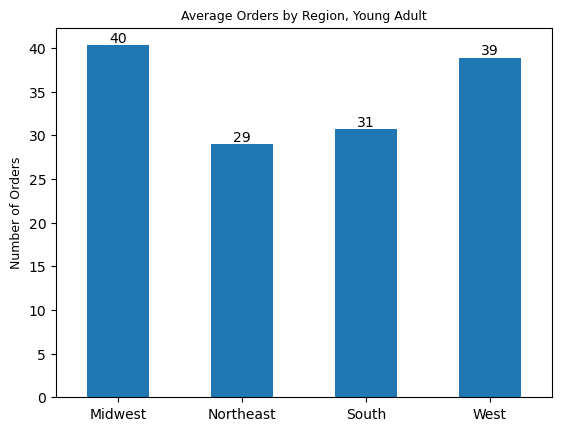

In [277]:
# Aggregate max_order by region for the sample

bar_ya_avg_order = ya_dep_income.groupby('region').agg({'max_order': ['mean']}).plot.bar()

# Remove label for x-axis
bar_ya_avg_order.set(xlabel=None)

# Set labels for x-axis
bar_ya_avg_order.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Set label for y-axis
bar_ya_avg_order.set_ylabel( "Number of Orders" , size = 9 )
  
# Remove legend
bar_ya_avg_order.get_legend().remove()
  
# Set title for plot
bar_ya_avg_order.set_title( "Average Orders by Region, Young Adult" , size = 9 )

# Bar labels
bar_ya_avg_order.bar_label(bar_ya_avg_order.containers[0], fmt='%.f')

[Text(0, 0, '8.1'), Text(0, 0, '7.9'), Text(0, 0, '7.9'), Text(0, 0, '8.0')]

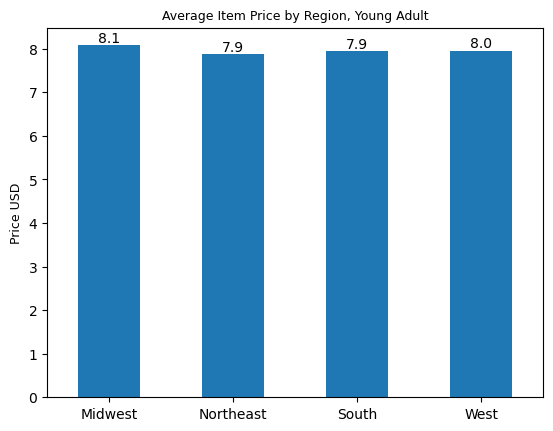

In [322]:
# Aggregate average prices by region for sample

bar_ya_avg_prices = ya_dep_income.groupby('region').agg({'prices': ['mean']}).plot.bar()

# Remove label for x-axis
bar_ya_avg_prices.set(xlabel=None)

# Set x-axis labels
bar_ya_avg_prices.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Set label for y-axis
bar_ya_avg_prices.set_ylabel( "Price USD" , size = 9 )
  
# Remove legend
bar_ya_avg_prices.get_legend().remove()
  
# Set title for plot
bar_ya_avg_prices.set_title( "Average Item Price by Region, Young Adult" , size = 9 )

# Bar labels
bar_ya_avg_prices.bar_label(bar_ya_avg_prices.containers[0], fmt='{:.1f}')

[Text(0, 0, '10'), Text(0, 0, '12'), Text(0, 0, '11'), Text(0, 0, '10')]

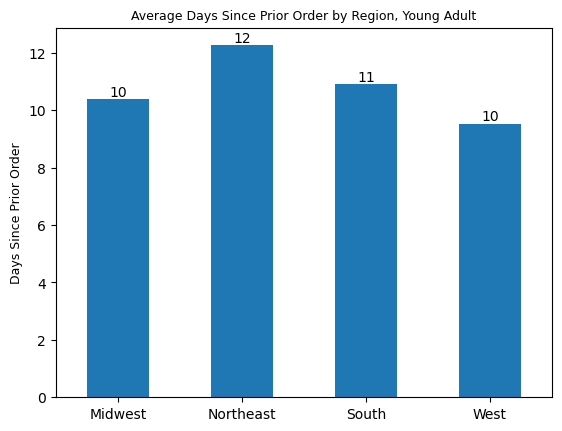

In [314]:
# Aggregate average days since prior order by region for sample

bar_ya_days_prior = ya_dep_income.groupby('region').agg({'days_since_prior_order': ['mean']}).plot.bar()

# Remove label for x-axis
bar_ya_days_prior.set(xlabel=None)

# Set x-axis labels
bar_ya_days_prior.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Set label for y-axis
bar_ya_days_prior.set_ylabel( "Days Since Prior Order" , size = 9 )
  
# Remove legend
bar_ya_days_prior.get_legend().remove()
  
# Set title for plot
bar_ya_days_prior.set_title( "Average Days Since Prior Order by Region, Young Adult" , size = 9 )

# Bar labels
bar_ya_days_prior.bar_label(bar_ya_days_prior.containers[0], fmt='{:.0f}')

In [280]:
# Count order items by department for the sample

ya_dep_income['department_id'].value_counts(dropna = False)

4     13711
16     8224
7      4508
19     3844
1      3104
13     2704
3      2029
20     1796
15     1636
9      1390
17     1336
12     1051
14     1044
11      734
18      546
5       456
6       361
8       211
21      110
10       54
2        39
Name: department_id, dtype: int64

[Text(0, 0, '13,711'),
 Text(0, 0, '8,224'),
 Text(0, 0, '4,508'),
 Text(0, 0, '3,844'),
 Text(0, 0, '3,104')]

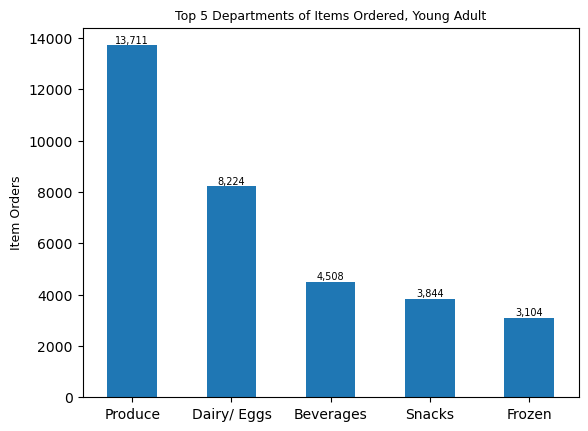

In [281]:
# Create bar chart of the top 5 for the sample

bar_ya_dept = ya_dep_income['department_id'].value_counts(dropna = False).head(5).plot.bar()

# Set label for x-axis
bar_ya_dept.set(xlabel= None)

bar_ya_dept.set_xticklabels(['Produce','Dairy/ Eggs','Beverages','Snacks','Frozen'], rotation = 0)

# Set label for y-axis
bar_ya_dept.set_ylabel( "Item Orders" , size = 9 )
  
# Set title for plot
bar_ya_dept.set_title( "Top 5 Departments of Items Ordered, Young Adult" , size = 9 )

#Bar labels
bar_ya_dept.bar_label(bar_ya_dept.containers[0], fmt='{:,.0f}', size = 7)

[Text(0, 0, '9,479,291'),
 Text(0, 0, '5,398,747'),
 Text(0, 0, '2,887,550'),
 Text(0, 0, '2,688,123'),
 Text(0, 0, '2,234,743')]

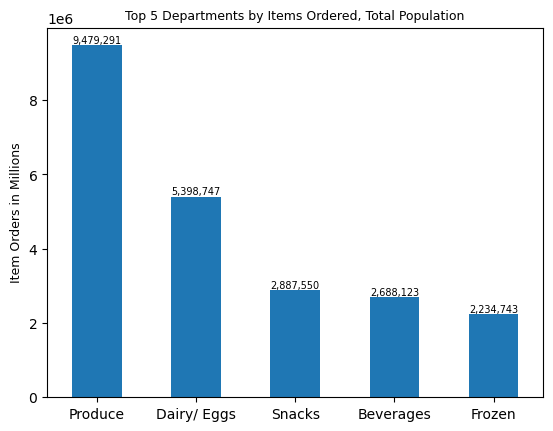

In [192]:
# Create bar chart of the departments for the population

bar_ords_prods_dept = ords_prods_cust['department_id'].value_counts(dropna = False).head(5).plot.bar()

# Set label for x-axis
bar_ords_prods_dept.set(xlabel=None)

bar_ords_prods_dept.set_xticklabels(['Produce','Dairy/ Eggs','Snacks','Beverages','Frozen'], rotation = 0)

# Set label for y-axis
bar_ords_prods_dept.set_ylabel( "Item Orders in Millions" , size = 9 )
  
# Set title for plot
bar_ords_prods_dept.set_title( "Top 5 Departments by Items Ordered, Total Population" , size = 9 )

#Bar labels
bar_ords_prods_dept.bar_label(bar_ords_prods_dept.containers[0], fmt='{:,.0f}', size = 7)

In [446]:
ords_prods_cust.shape

(32404859, 38)

In [282]:
# Days of the week orders placed for sample

ya_dep_income['time_category'].value_counts(dropna = False)

Afternoon    20243
Morning      16113
Evening      10209
Overnight     2323
Name: time_category, dtype: int64

In [296]:
# Time of day orders placed for sample

time_ya_crosstab = pd.crosstab(ya_dep_income['orders_day_of_week'], ya_dep_income['time_category'], dropna = False)

# Reorder columns
time_ya_crosstab = time_ya_crosstab.reindex(['Morning', 'Afternoon', 'Evening','Overnight'], 
     axis="columns")

[Text(0, 0, '281'),
 Text(0, 0, '350'),
 Text(0, 0, '287'),
 Text(0, 0, '361'),
 Text(0, 0, '392'),
 Text(0, 0, '297'),
 Text(0, 0, '355')]

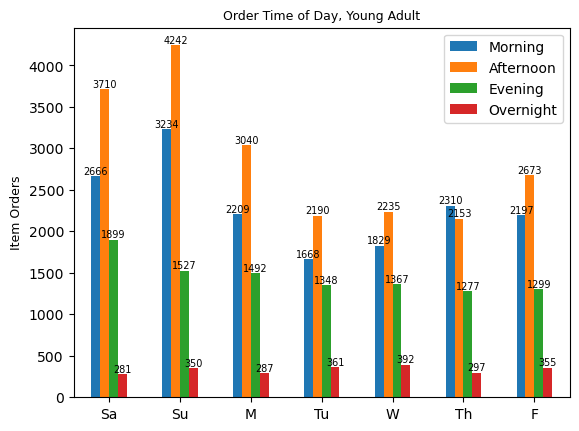

In [297]:
bar_time_ya_crosstab = time_ya_crosstab.plot.bar()

# Set label for x-axis
bar_time_ya_crosstab.set(xlabel=None)
bar_time_ya_crosstab.set_xticklabels(['Sa','Su','M','Tu','W','Th','F'], rotation = 0)

# Set label for y-axis
bar_time_ya_crosstab.set_ylabel( "Item Orders" , size = 9 )
  
# Set title for plot
bar_time_ya_crosstab.set_title( "Order Time of Day, Young Adult" , size = 9 )

#Change legend
bar_time_ya_crosstab.legend(title=None)

#Bar labels
bar_time_ya_crosstab.bar_label(bar_time_ya_crosstab.containers[0], fmt='{:.0f}', size = 7)
bar_time_ya_crosstab.bar_label(bar_time_ya_crosstab.containers[1], fmt='{:.0f}', size = 7)
bar_time_ya_crosstab.bar_label(bar_time_ya_crosstab.containers[2], fmt='{:.0f}', size = 7)
bar_time_ya_crosstab.bar_label(bar_time_ya_crosstab.containers[3], fmt='{:.0f}', size = 7)

#### 7.3 Create second profiling variable: retired adults with dependants, upper income

In [298]:
# Define profiling variable for retired adult with dependants - age category

rd = ords_prods_cust[ords_prods_cust['age_category']=="Over 60"]

In [299]:
# Check sample
rd.shape

(10582839, 38)

In [300]:
rd.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,region,cust_activity,age_category,dep_category,income_category,time_category
1234,75032,Female,Georgia,75,1/1/2017,1,married,57835,87596,1,2,8,NaN,10258,7,0,both,Pistachios,117,19,3.0,Low-range product,Regularly busy,Low-range product,Regularly busy,Average orders,54,Loyal customer,4.987347,Low spender,7.0,Frequent customer,South,Regular customer,Over 60,Dependants,50 to 100K,Morning
1235,75032,Female,Georgia,75,1/1/2017,1,married,57835,2223515,2,2,7,7.0,10258,3,1,both,Pistachios,117,19,3.0,Low-range product,Regularly busy,Low-range product,Regularly busy,Average orders,54,Loyal customer,4.987347,Low spender,7.0,Frequent customer,South,Regular customer,Over 60,Dependants,50 to 100K,Morning
1236,75032,Female,Georgia,75,1/1/2017,1,married,57835,46835,3,2,9,7.0,10258,4,1,both,Pistachios,117,19,3.0,Low-range product,Regularly busy,Low-range product,Regularly busy,Most orders,54,Loyal customer,4.987347,Low spender,7.0,Frequent customer,South,Regular customer,Over 60,Dependants,50 to 100K,Morning
1237,75032,Female,Georgia,75,1/1/2017,1,married,57835,1084904,9,2,7,8.0,10258,3,1,both,Pistachios,117,19,3.0,Low-range product,Regularly busy,Low-range product,Regularly busy,Average orders,54,Loyal customer,4.987347,Low spender,7.0,Frequent customer,South,Regular customer,Over 60,Dependants,50 to 100K,Morning
1238,75032,Female,Georgia,75,1/1/2017,1,married,57835,2450055,13,2,9,7.0,10258,8,1,both,Pistachios,117,19,3.0,Low-range product,Regularly busy,Low-range product,Regularly busy,Most orders,54,Loyal customer,4.987347,Low spender,7.0,Frequent customer,South,Regular customer,Over 60,Dependants,50 to 100K,Morning


In [301]:
# Add dependants category to sample

rd_dep = rd[rd['dep_category'] == "Dependants"]

In [302]:
rd_dep.shape

(7928248, 38)

In [303]:
rd_dep_inc = rd_dep[rd_dep['income_category'] == "100 to 250K"]

In [304]:
rd_dep_inc.shape

(5480658, 38)

#### 7.4 Run aggregations on second profiling sample

In [305]:
# Aggregate descriptive statistics for this sample, max_order column

rd_dep_inc.agg({'max_order': ['mean', 'min', 'max']})

,max_order
mean,33.250782
min,1.000000
max,99.000000


In [306]:
# Aggregate descriptive statistics for this sample, prices column

rd_dep_inc.agg({'prices': ['mean', 'min', 'max']})

,prices
mean,7.962932
min,1.000000
max,25.000000


[Text(0, 0, '33'), Text(0, 0, '34'), Text(0, 0, '33'), Text(0, 0, '34')]

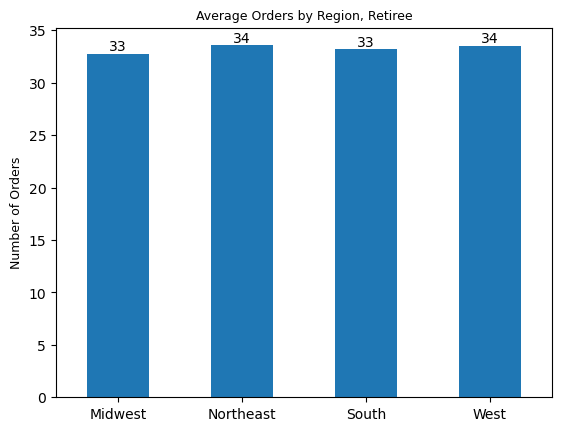

In [308]:
# Aggregate max_order by region for the sample

bar_rd_avg_order = rd_dep_inc.groupby('region').agg({'max_order': ['mean']}).plot.bar()

# Remove label for x-axis
bar_rd_avg_order.set(xlabel=None)

# Set x-axis labels
bar_rd_avg_order.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Set label for y-axis
bar_rd_avg_order.set_ylabel("Number of Orders" , size = 9 )
  
# Remove legend
bar_rd_avg_order.get_legend().remove()
  
# Set title for plot
bar_rd_avg_order.set_title( "Average Orders by Region, Retiree" , size = 9 )

# Bar labels
bar_rd_avg_order.bar_label(bar_rd_avg_order.containers[0], fmt='%.f')

[Text(0, 0, '7.9'), Text(0, 0, '8.0'), Text(0, 0, '8.0'), Text(0, 0, '8.0')]

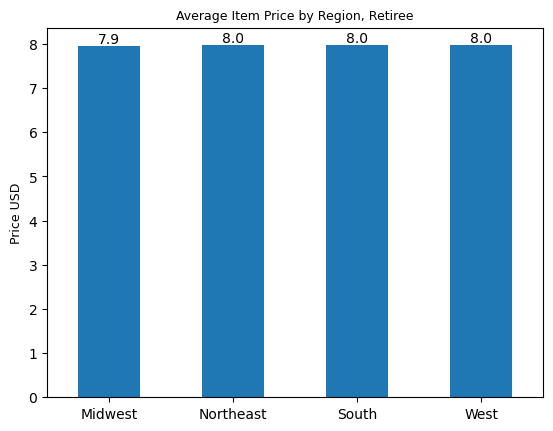

In [323]:
# Aggregate average prices by region for sample

bar_rd_avg_prices = rd_dep_inc.groupby('region').agg({'prices': ['mean']}).plot.bar()

# remove legend
bar_rd_avg_prices.get_legend().remove()

# Set x-axis labels
bar_rd_avg_prices.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Remove label for x-axis
bar_rd_avg_prices.set(xlabel=None)
  
# Set label for y-axis
bar_rd_avg_prices.set_ylabel( "Price USD" , size = 9 )
  
# Set title for plot
bar_rd_avg_prices.set_title( "Average Item Price by Region, Retiree" , size = 9 )

# Bar labels
bar_rd_avg_prices.bar_label(bar_rd_avg_prices.containers[0], fmt='{:.1f}')

[Text(0, 0, '11'), Text(0, 0, '11'), Text(0, 0, '11'), Text(0, 0, '11')]

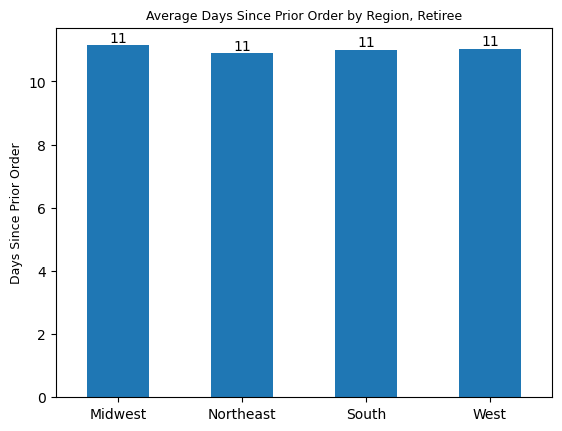

In [326]:
# Aggregate average days since prior order by region for sample

bar_rd_days_prior = rd_dep_inc.groupby('region').agg({'days_since_prior_order': ['mean']}).plot.bar()

# Remove label for x-axis
bar_rd_days_prior.set(xlabel=None)

# Set x-axis labels
bar_rd_days_prior.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Set label for y-axis
bar_rd_days_prior.set_ylabel( "Days Since Prior Order" , size = 9 )
  
# Remove legend
bar_rd_days_prior.get_legend().remove()
  
# Set title for plot
bar_rd_days_prior.set_title( "Average Days Since Prior Order by Region, Retiree" , size = 9 )

# Bar labels
bar_rd_days_prior.bar_label(bar_rd_days_prior.containers[0], fmt='{:.0f}')

In [327]:
# Count order items by department for the sample

rd_dep_inc['department_id'].value_counts(dropna = False)

4     1639619
16     927938
7      432506
19     425603
1      382822
13     323965
3      201512
15     189311
20     179804
9      152428
12     131125
17     122409
14     113548
18      74689
11      73930
6       45648
5       23066
8       17018
21      11989
2        6070
10       5658
Name: department_id, dtype: int64

[Text(0, 0, '1,639,619'),
 Text(0, 0, '927,938'),
 Text(0, 0, '432,506'),
 Text(0, 0, '425,603'),
 Text(0, 0, '382,822')]

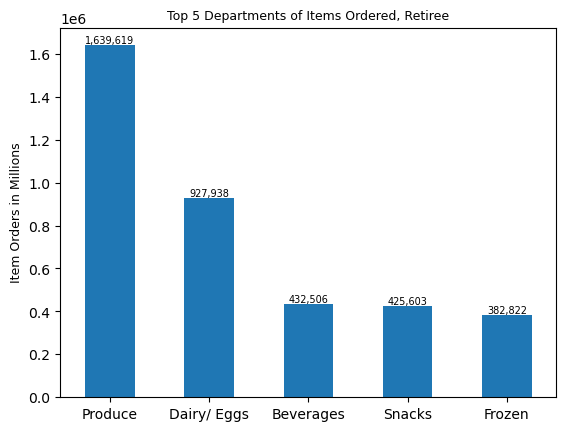

In [330]:
# Create bar chart of the top 5 

bar_rd_dept = rd_dep_inc['department_id'].value_counts(dropna = False).head(5).plot.bar()

# Remove label for x-axis
bar_rd_dept.set(xlabel=None)

bar_rd_dept.set_xticklabels(['Produce','Dairy/ Eggs','Beverages','Snacks','Frozen'], rotation = 0)

# Set label for y-axis
bar_rd_dept.set_ylabel( "Item Orders in Millions" , size = 9 )
  
# Set title for plot
bar_rd_dept.set_title( "Top 5 Departments of Items Ordered, Retiree" , size = 9 )

# Bar labels
bar_rd_dept.bar_label(bar_rd_dept.containers[0], fmt='{:,.0f}', size=7)

In [331]:
# Days of the week orders placed for sample

rd_dep_inc['orders_day_of_week'].value_counts(dropna = False)

0    1081697
1     933806
6     784400
5     702156
2     699039
3     645884
4     633676
Name: orders_day_of_week, dtype: int64

In [332]:
# Time of day orders placed for sample

time_rd_crosstab = pd.crosstab(rd_dep_inc['orders_day_of_week'], rd_dep_inc['time_category'], dropna = False)
# Set label for x-axis

# Reorder columns

time_rd_crosstab = time_rd_crosstab.reindex(['Morning', 'Afternoon', 'Evening','Overnight'], 
     axis="columns")


[Text(0, 0, '49,521'),
 Text(0, 0, '41,054'),
 Text(0, 0, '36,404'),
 Text(0, 0, '34,892'),
 Text(0, 0, '35,658'),
 Text(0, 0, '37,797'),
 Text(0, 0, '41,959')]

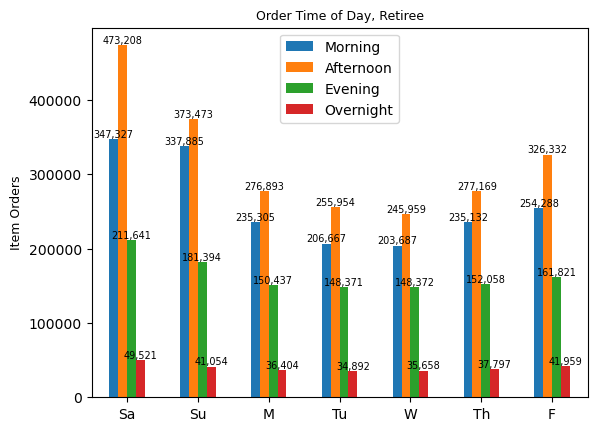

In [335]:
# Plot the chart

bar_time_rd_crosstab = time_rd_crosstab.plot.bar()

# Set x-axis
bar_time_rd_crosstab.set(xlabel=None)

bar_time_rd_crosstab.set_xticklabels(['Sa','Su','M','Tu','W','Th','F'], rotation = 0)

# Set for y-axis
bar_time_rd_crosstab.set_ylabel( "Item Orders" , size = 9 )
  
# Set title for plot
bar_time_rd_crosstab.set_title( "Order Time of Day, Retiree" , size = 9 )

# Change legend
bar_time_rd_crosstab.legend(title=None, loc = 'upper center')

# Bar labels
bar_time_rd_crosstab.bar_label(bar_time_rd_crosstab.containers[0], fmt='{:,.0f}', size = 7)
bar_time_rd_crosstab.bar_label(bar_time_rd_crosstab.containers[1], fmt='{:,.0f}', size = 7)
bar_time_rd_crosstab.bar_label(bar_time_rd_crosstab.containers[2], fmt='{:,.0f}', size = 7)
bar_time_rd_crosstab.bar_label(bar_time_rd_crosstab.containers[3], fmt='{:,.0f}', size = 7)

#### 7.5 Create third profiling sample: working parents, middle income

In [395]:
# Working parents sample
wp = ords_prods_cust[ords_prods_cust['age_category']=="31 to 60"]

In [396]:
wp.shape

(15222661, 38)

In [397]:
wp_inc = wp[wp['income_category']=='50 to 100K']

In [398]:
wp_inc.shape

(6338372, 38)

In [399]:
wp_inc_dep = wp_inc[wp_inc['dep_category']=='Dependants']

In [400]:
wp_inc_dep.shape

(4772185, 38)

#### 7.6 Run aggregations on third profiling sample

In [401]:
# Time of day orders placed for sample

time_wp_crosstab = pd.crosstab(wp_inc_dep['orders_day_of_week'], wp_inc_dep['time_category'], dropna = False)

# Reorder columns

time_wp_crosstab = time_wp_crosstab.reindex(['Morning', 'Afternoon', 'Evening','Overnight'], 
     axis="columns")

[Text(0, 0, '43,814'),
 Text(0, 0, '35,568'),
 Text(0, 0, '32,566'),
 Text(0, 0, '30,464'),
 Text(0, 0, '31,561'),
 Text(0, 0, '32,716'),
 Text(0, 0, '37,612')]

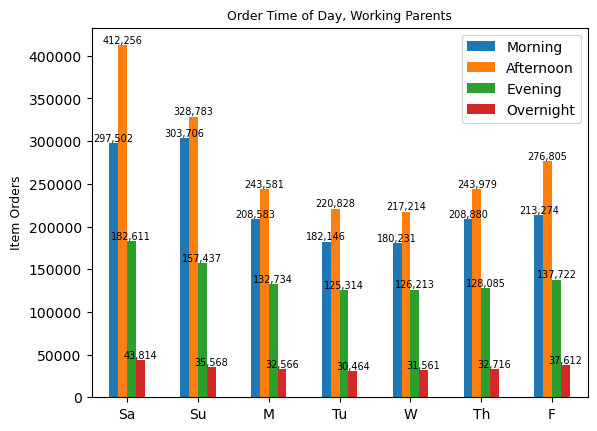

In [402]:
# Plot the chart

bar_time_wp_crosstab = time_wp_crosstab.plot.bar()

# Set x-axis

bar_time_wp_crosstab.set(xlabel=None)
bar_time_wp_crosstab.set_xticklabels(['Sa','Su','M','Tu','W','Th','F'], rotation = 0)

# Set  y-axis
bar_time_wp_crosstab.set_ylabel( "Item Orders" , size = 9 )
  
# Set title for plot
bar_time_wp_crosstab.set_title( "Order Time of Day, Working Parents" , size = 9 )

#Change legend
bar_time_wp_crosstab.legend(title=None)

# Bar labels
bar_time_wp_crosstab.bar_label(bar_time_wp_crosstab.containers[0], fmt='{:,.0f}', size = 7)
bar_time_wp_crosstab.bar_label(bar_time_wp_crosstab.containers[1], fmt='{:,.0f}', size = 7)
bar_time_wp_crosstab.bar_label(bar_time_wp_crosstab.containers[2], fmt='{:,.0f}', size = 7)
bar_time_wp_crosstab.bar_label(bar_time_wp_crosstab.containers[3], fmt='{:,.0f}', size = 7)

[Text(0, 0, '1,425,290'),
 Text(0, 0, '808,625'),
 Text(0, 0, '396,526'),
 Text(0, 0, '380,825'),
 Text(0, 0, '326,992')]

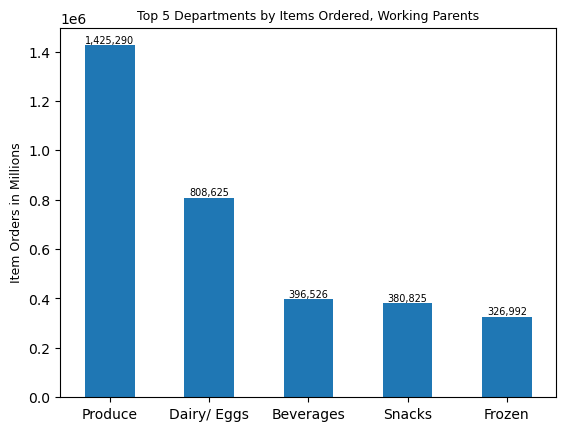

In [403]:
# Create bar chart of the departments for the population

bar_wp_dept = wp_inc_dep['department_id'].value_counts(dropna = False).head(5).plot.bar()

# Set label for x-axis
bar_wp_dept.set(xlabel=None)

bar_wp_dept.set_xticklabels(['Produce','Dairy/ Eggs','Beverages','Snacks','Frozen'], rotation = 0)

# Set label for y-axis
bar_wp_dept.set_ylabel( "Item Orders in Millions" , size = 9 )
  
# Set title for plot
bar_wp_dept.set_title( "Top 5 Departments by Items Ordered, Working Parents" , size = 9 )

# Bar labels
bar_wp_dept.bar_label(bar_wp_dept.containers[0], fmt='{:,.0f}', size = 7)

[Text(0, 0, '33'), Text(0, 0, '34'), Text(0, 0, '34'), Text(0, 0, '34')]

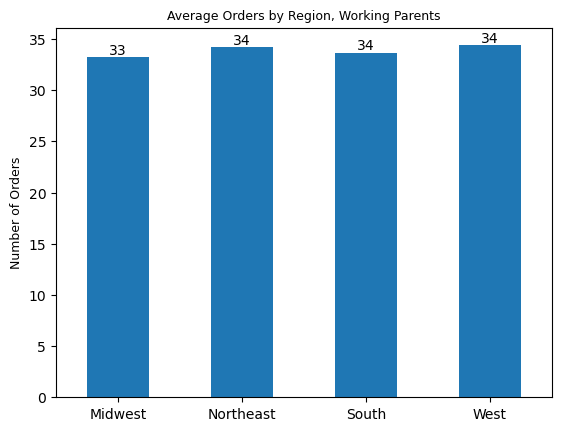

In [404]:
# Aggregate max_order by region for the sample

bar_wp_avg_order = wp_inc_dep.groupby('region').agg({'max_order': ['mean']}).plot.bar()

# Remove label for x-axis
bar_wp_avg_order.set(xlabel=None)

# Set x-axis labels
bar_wp_avg_order.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Set label for y-axis
bar_wp_avg_order.set_ylabel("Number of Orders" , size = 9 )
  
# Remove legend
bar_wp_avg_order.get_legend().remove()
  
# Set title for plot
bar_wp_avg_order.set_title( "Average Orders by Region, Working Parents" , size = 9 )

# Bar labels
bar_wp_avg_order.bar_label(bar_wp_avg_order.containers[0], fmt='{:,.0f}')

[Text(0, 0, '11'), Text(0, 0, '11'), Text(0, 0, '11'), Text(0, 0, '11')]

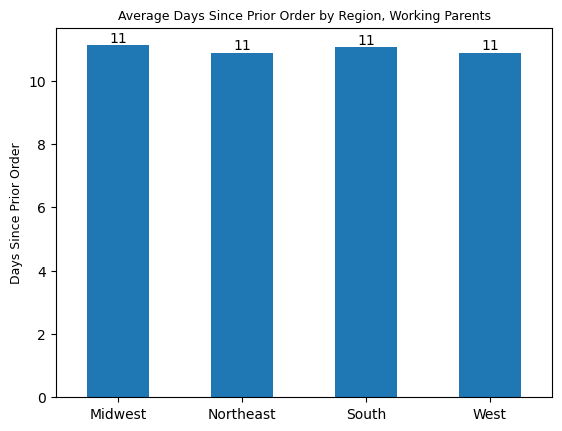

In [405]:
# Aggregate average days since prior order by region for sample

bar_wp_days_prior = wp_inc_dep.groupby('region').agg({'days_since_prior_order': ['mean']}).plot.bar()

# Remove label for x-axis
bar_wp_days_prior.set(xlabel=None)

# Set x-axis labels
bar_wp_days_prior.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Set label for y-axis
bar_wp_days_prior.set_ylabel( "Days Since Prior Order" , size = 9 )
  
# Remove legend
bar_wp_days_prior.get_legend().remove()
  
# Set title for plot
bar_wp_days_prior.set_title( "Average Days Since Prior Order by Region, Working Parents" , size = 9 )

# Bar labels
bar_wp_days_prior.bar_label(bar_wp_days_prior.containers[0], fmt='{:,.0f}')

[Text(0, 0, '8'), Text(0, 0, '8'), Text(0, 0, '8'), Text(0, 0, '8')]

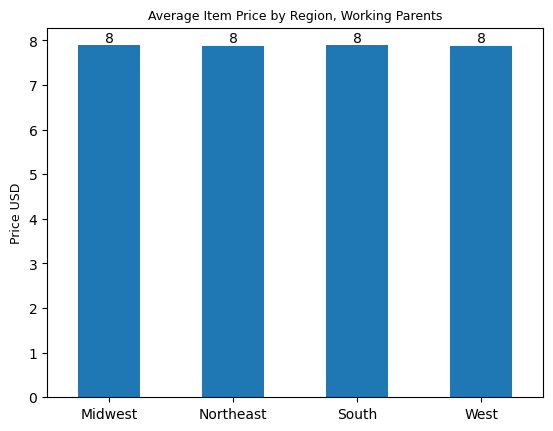

In [406]:
# Aggregate average prices by region for sample

bar_wp_avg_prices = wp_inc_dep.groupby('region').agg({'prices': ['mean']}).plot.bar()

# remove legend
bar_wp_avg_prices.get_legend().remove()

# Set x-axis labels
bar_wp_avg_prices.set_xticklabels(labels=['Midwest','Northeast','South','West'], rotation=0)

# Remove label for x-axis
bar_wp_avg_prices.set(xlabel=None)
  
# Set label for y-axis
bar_wp_avg_prices.set_ylabel( "Price USD" , size = 9 )
  
# Set title for plot
bar_wp_avg_prices.set_title( "Average Item Price by Region, Working Parents" , size = 9 )

# Bar labels
bar_wp_avg_prices.bar_label(bar_wp_avg_prices.containers[0], fmt='{:,.0f}')

### 8. Group and aggregate orders in top selling departments

#### 8.1 Create subsets of high-selling Produce and Dairy/ Egg department orders

In [353]:
# Create subset of produce department items

ords_produce = ords_prods_cust[ords_prods_cust['department_id']==4]

In [354]:
# Check subset

ords_produce.shape

(9479291, 38)

In [355]:
# Describe subset

ords_produce.agg({'prices':['mean','min','max']})

,prices
mean,7.981708
min,1.000000
max,15.000000


In [356]:
# Create subset of dairy/ eggs department

ords_dairy = ords_prods_cust[ords_prods_cust['department_id']==16]

In [357]:
# Check subset

ords_dairy.shape

(5398747, 38)

In [358]:
# Describe subset

ords_dairy.agg({'prices':['mean','min','max']})

,prices
mean,8.335056
min,1.000000
max,15.000000


In [359]:
# Choose high priced produce items

ords_produce_high = ords_produce[ords_produce['prices']>=10]

In [360]:
ords_produce_high.shape

(3308138, 38)

In [361]:
# Choose high priced dairy/ egg dept items

ords_dairy_high = ords_dairy[ords_dairy['prices']>=10]

In [362]:
ords_dairy_high.shape

(2221590, 38)

#### 8.2 Check sales patterns on the high-priced order subsets 

In [367]:
# Check Produce orders by age and time

produce_age_crosstab = pd.crosstab(ords_produce_high['age_category'], ords_produce_high['time_category'], dropna = False)

# Reorder columns

produce_age_crosstab = produce_age_crosstab.reindex(['Morning', 'Afternoon', 'Evening','Overnight'], 
     axis="columns")


[Text(0, 0, '35,419'), Text(0, 0, '82,954'), Text(0, 0, '56,649')]

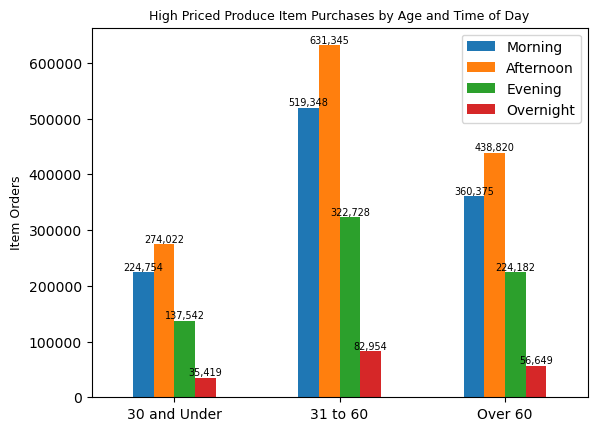

In [447]:
# Plot chart

bar_produce_age = produce_age_crosstab.plot.bar()

# Set x-axis
bar_produce_age.set(xlabel=None)

bar_produce_age.set_xticklabels(labels = ['30 and Under', '31 to 60', 'Over 60'],rotation=0)

# Set y-axis
bar_produce_age.set_ylabel( "Item Orders" , size = 9 )
  
# Set title for plot
bar_produce_age.set_title( "High Priced Produce Item Purchases by Age and Time of Day" , size = 9 )

bar_produce_age.legend(title=None)

# Bar labels
bar_produce_age.bar_label(bar_produce_age.containers[0], fmt='{:,.0f}', size = 7)
bar_produce_age.bar_label(bar_produce_age.containers[1], fmt='{:,.0f}', size = 7)
bar_produce_age.bar_label(bar_produce_age.containers[2], fmt='{:,.0f}', size = 7)
bar_produce_age.bar_label(bar_produce_age.containers[3], fmt='{:,.0f}', size = 7)

In [383]:
# Check produce items purchased by time and region

produce_region_crosstab = pd.crosstab(ords_produce_high['region'], ords_produce_high['time_category'], dropna = False)

produce_region_crosstab = produce_region_crosstab.reindex(['Morning', 'Afternoon', 'Evening','Overnight'], 
     axis="columns")

[Text(0, 0, '41,118'),
 Text(0, 0, '31,745'),
 Text(0, 0, '55,075'),
 Text(0, 0, '47,084')]

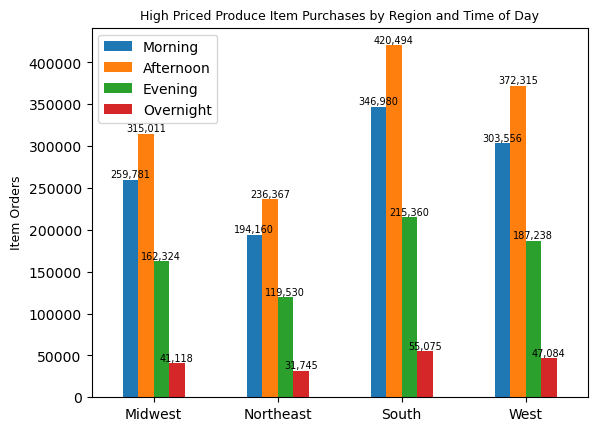

In [388]:
# Plot the chart

bar_produce_region = produce_region_crosstab.plot.bar()

# Set x-axis

bar_produce_region.set(xlabel=None)

bar_produce_region.set_xticklabels(['Midwest','Northeast','South','West'], rotation = 0)

# Set  y-axis
bar_produce_region.set_ylabel( "Item Orders" , size = 9 )
  
# Set title for plot
bar_produce_region.set_title( "High Priced Produce Item Purchases by Region and Time of Day" , size = 9 )

bar_produce_region.legend(title=None)

# Bar labels
bar_produce_region.bar_label(bar_produce_region.containers[0], fmt='{:,.0f}', size = 7)
bar_produce_region.bar_label(bar_produce_region.containers[1], fmt='{:,.0f}', size = 7)
bar_produce_region.bar_label(bar_produce_region.containers[2], fmt='{:,.0f}', size = 7)
bar_produce_region.bar_label(bar_produce_region.containers[3], fmt='{:,.0f}', size = 7)

In [389]:
# Check Dairy orders by age and time

dairy_age_crosstab = pd.crosstab(ords_dairy_high['age_category'], ords_dairy_high['time_category'], dropna = False)

# Reorder columns

dairy_age_crosstab = dairy_age_crosstab.reindex(['Morning', 'Afternoon', 'Evening','Overnight'], 
     axis="columns")

[Text(0, 0, '22,194'), Text(0, 0, '51,835'), Text(0, 0, '35,033')]

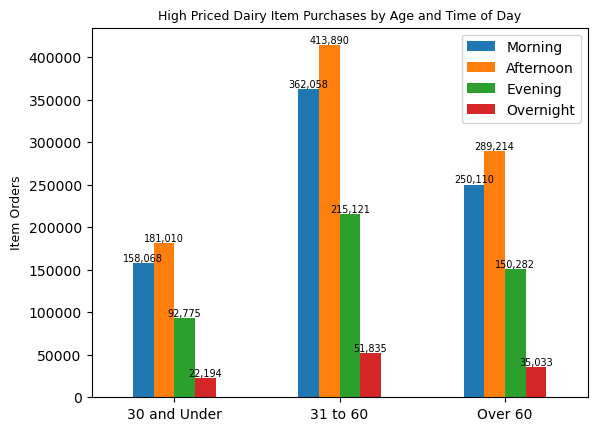

In [391]:
# Plot chart

bar_dairy_age = dairy_age_crosstab.plot.bar()

# Set x-axis
bar_dairy_age.set(xlabel=None)

bar_dairy_age.set_xticklabels(labels = ['30 and Under', '31 to 60', 'Over 60'],rotation=0)

# Set y-axis
bar_dairy_age.set_ylabel( "Item Orders" , size = 9 )
  
# Set title for plot
bar_dairy_age.set_title( "High Priced Dairy Item Purchases by Age and Time of Day" , size = 9 )

bar_dairy_age.legend(title=None)

# Bar labels
bar_dairy_age.bar_label(bar_dairy_age.containers[0], fmt='{:,.0f}', size = 7)
bar_dairy_age.bar_label(bar_dairy_age.containers[1], fmt='{:,.0f}', size = 7)
bar_dairy_age.bar_label(bar_dairy_age.containers[2], fmt='{:,.0f}', size = 7)
bar_dairy_age.bar_label(bar_dairy_age.containers[3], fmt='{:,.0f}', size = 7)

In [393]:
# Check Dairy orders by time and region

dairy_region_crosstab = pd.crosstab(ords_dairy_high['region'], ords_dairy_high['time_category'], dropna = False)

dairy_region_crosstab = dairy_region_crosstab.reindex(['Morning', 'Afternoon', 'Evening','Overnight'], 
     axis="columns")

[Text(0, 0, '25,794'),
 Text(0, 0, '19,504'),
 Text(0, 0, '34,103'),
 Text(0, 0, '29,661')]

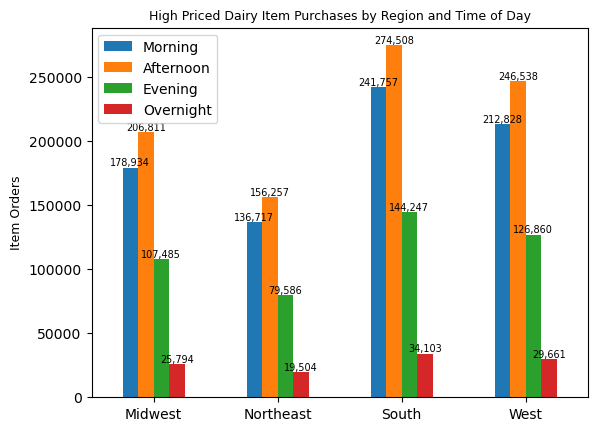

In [394]:
# Plot the chart

bar_dairy_region = dairy_region_crosstab.plot.bar()

# Set x-axis

bar_dairy_region.set(xlabel=None)

bar_dairy_region.set_xticklabels(['Midwest','Northeast','South','West'], rotation = 0)

# Set  y-axis
bar_dairy_region.set_ylabel( "Item Orders" , size = 9 )
  
# Set title for plot
bar_dairy_region.set_title( "High Priced Dairy Item Purchases by Region and Time of Day" , size = 9 )

bar_dairy_region.legend(title=None)

# Bar labels
bar_dairy_region.bar_label(bar_dairy_region.containers[0], fmt='{:,.0f}', size = 7)
bar_dairy_region.bar_label(bar_dairy_region.containers[1], fmt='{:,.0f}', size = 7)
bar_dairy_region.bar_label(bar_dairy_region.containers[2], fmt='{:,.0f}', size = 7)
bar_dairy_region.bar_label(bar_dairy_region.containers[3], fmt='{:,.0f}', size = 7)

### 9. Export charts and data sets

In [411]:
# Export data sets

ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

In [412]:
# Check exported data set

ords_prods_cust.shape

(32404859, 38)

In [413]:
ords_prods_cust_low.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_low.pkl'))

In [414]:
ords_prods_cust_low.shape

(1440295, 34)

In [415]:
rd_dep_inc.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'retiree_sample.pkl'))

In [416]:
# Check export

rd_dep_inc.shape

(5480658, 38)

In [417]:
ya_dep_income.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'young_adult_sample.pkl'))

In [418]:
# Check export

ya_dep_income.shape

(48888, 38)

In [419]:
wp_inc_dep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'working_parent_sample.pkl'))

In [420]:
wp_inc_dep.shape

(4772185, 38)

In [407]:
ords_produce.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'produce_orders.pkl'))

In [408]:
ords_produce.shape

(9479291, 38)

In [409]:
ords_dairy.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'dairy_orders.pkl'))

In [410]:
ords_dairy.shape

(5398747, 38)

In [421]:
# Export charts

bar_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_income.png'))

In [422]:
bar_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dep.png'))

In [423]:
bar_age_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_loyalty.png'))

In [424]:
bar_region_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_loyalty.png'))

In [425]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [426]:
bar_ya_avg_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ya_avg_order.png'))

In [427]:
bar_ya_avg_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ya_avg_prices.png'))

In [428]:
bar_ya_days_prior.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ya_days_prior.png'))

In [429]:
bar_ya_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ya_dept.png'))

In [430]:
bar_rd_avg_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_rd_avg_order.png'))

In [431]:
bar_rd_avg_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_rd_avg_prices.png'))

In [432]:
bar_rd_days_prior.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_rd_days_prior.png'))

In [433]:
bar_rd_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_rd_dept.png'))

In [434]:
bar_time_rd_crosstab.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_rd_time.png'))

In [435]:
bar_time_ya_crosstab.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ya_time.png'))

In [436]:
bar_ords_prods_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depts.png'))

In [437]:
bar_time_wp_crosstab.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_wp_time.png'))

In [438]:
bar_wp_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_wp_dept.png'))

In [439]:
bar_wp_avg_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_wp_avg_order.png'))

In [440]:
bar_wp_days_prior.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_wp_days_prior.png'))

In [441]:
bar_wp_avg_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_wp_avg_prices.png'))

In [448]:
bar_produce_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_produce_age.png'))

In [442]:
bar_produce_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_produce_region.png'))

In [443]:
bar_dairy_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dairy_age.png'))

In [444]:
bar_dairy_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dairy_region.png'))